# landcover-hack ODC workshop 2019

This is a test notebook to derive a level 3 classification for select areas in Australia based on the FAO LCCS landcover classification

In [46]:
%matplotlib inline
import numpy
import xarray
import scipy
from matplotlib import pyplot
from matplotlib import cm
import matplotlib.gridspec as gridspec
import datacube
from datacube.storage import masking

#import classification script
import lccs_l3

Data input from AWS DEA

In [47]:
# set up object and bounds

dc = datacube.Datacube(app="le_lccs")

res = (-25, 25)

# # Ayr
# min_x = 1500000.000
# max_x = 1600000.000
# min_y = -2200000.000
# max_y = -2100000.000

# # Diamentina
# min_x = 800000.000
# max_x = 900000.000
# min_y = -2800000.000
# max_y = -2700000.000

# # Gwydir
# min_x = 1600000.000
# max_x = 1700000.000
# min_y = -3400000.000
# max_y = -3300000.000

# Leichhardt
# min_x = 800000.000
# max_x = 900000.000
# min_y = -2000000.000
# max_y = -1900000.000

# # Barmah-Millewa
min_x = 1130000.000
max_x = 1230000.000
min_y = -4020000.000
max_y = -3920000.000

# # Forescue marshes
# min_x = -1200000.000
# max_x = -1300000.000
# min_y = -2500000.000
# max_y = -2400000.000

# # Snowy
# min_x = 1400000.000
# max_x = 1500000.000
# min_y = -4100000.000
# max_y = -4000000.000

results = " Barmah-Millewa-2015.tif"
out_crs = "EPSG:3577"

time = ("2015-01-01", "2015-12-15")

query=({'x':(min_x, max_x),
        'y':(min_y, max_y),
        'crs':out_crs,
        'resolution':res})

sensor= 'ls8'

## 5 layers required for level 3 classification

- vegetat_veg_cat (layer for vegetation/non vegetation)
- aquatic_wat_cat (layer for aquatic/terrestrial
- cultman_agr_cat (layer for cultivated/natural)
- artific_urb_cat (layer for artificial surfaces/bare areas)
- artwatr_wat_cat (layer for artificial water/natural water)

### vegetat_veg_cat

In [48]:
var_xarray = dc.load(product="fc_percentile_albers_annual", measurements=["PV_PC_50", "NPV_PC_50"], 
                     time=time, **query)
var_xarray = masking.mask_invalid_data(var_xarray)

# Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:    (time: 1, x: 4000, y: 4000)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01
  * y          (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x          (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    PV_PC_50   (time, y, x) float64 16.0 19.0 16.0 21.0 20.0 20.0 32.0 35.0 ...
    NPV_PC_50  (time, y, x) float64 48.0 43.0 37.0 39.0 36.0 35.0 39.0 40.0 ...
Attributes:
    crs:      EPSG:3577

In [49]:
# Create binary layer representing vegetated (1) and non-vegetated (0)
vegetat_veg_cat_ds = ((var_xarray["PV_PC_50"] >= 55) | (var_xarray["NPV_PC_50"] >= 55))

In [50]:
# Convert to Dataset and add name
vegetat_veg_cat_ds = vegetat_veg_cat_ds.to_dataset(name="vegetat_veg_cat")

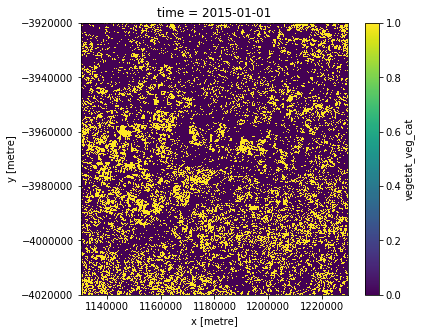

In [51]:
# Plot output
vegetat_veg_cat_ds["vegetat_veg_cat"].plot(figsize=(6, 5))

In [52]:
vegetat_veg_cat_ds = vegetat_veg_cat_ds.squeeze().drop('time')
vegetat_veg_cat_ds

<xarray.Dataset>
Dimensions:          (x: 4000, y: 4000)
Coordinates:
  * y                (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x                (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    vegetat_veg_cat  (y, x) bool False False False False False False False ...

### aquatic_wat_cat

In [53]:
var_xarray = dc.load(product="wofs_annual_summary",measurements=["frequency"], time=time, **query)

# Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:    (time: 1, x: 4000, y: 4000)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01
  * y          (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x          (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    frequency  (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      EPSG:3577

In [54]:
# Plot data
var_xarray = masking.mask_invalid_data(var_xarray).squeeze().drop('time')
#var_xarray.frequency.plot(figsize=(6, 5), cmap = 'Blues')

In [55]:
# Create binary layer representing aquatic (1) and terrestrial (0)
aquatic_wat_cat_ds = ((var_xarray["frequency"] >= 0.01))

In [56]:
aquatic_wat_cat_ds

<xarray.DataArray 'frequency' (y: 4000, x: 4000)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * y        (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x        (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...

In [57]:
# Convert to Dataset and add name
aquatic_wat_cat_ds = aquatic_wat_cat_ds.to_dataset(name="aquatic_wat_cat")

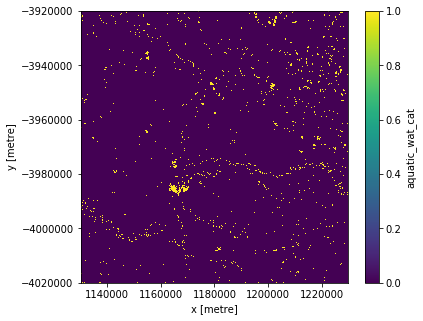

In [58]:
# Plot output
aquatic_wat_cat_ds["aquatic_wat_cat"].plot(figsize=(6, 5))

In [59]:
# aquatic_wat_cat_ds = aquatic_wat_cat_ds.squeeze().drop('time')
aquatic_wat_cat_ds

<xarray.Dataset>
Dimensions:          (x: 4000, y: 4000)
Coordinates:
  * y                (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x                (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    aquatic_wat_cat  (y, x) bool False False False False False False False ...

### cultman_agr_cat

In [60]:
ls8_mads = dc.load(product= sensor +"_nbart_tmad_annual", time=time, **query)

In [61]:
cultman_agr_cat = ((ls8_mads["edev"] > 0.115))

In [62]:
cultman_agr_cat = cultman_agr_cat.to_dataset(name="cultman_agr_cat")

In [63]:
cultman_agr_cat = cultman_agr_cat.squeeze().drop('time')
cultman_agr_cat

<xarray.Dataset>
Dimensions:          (x: 4000, y: 4000)
Coordinates:
  * y                (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x                (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    cultman_agr_cat  (y, x) bool False False False False False False False ...

### artific_urb_cat

#### Dry Bare Soil Index - DBSI

In [64]:
# Load data
ls8_gm = dc.load(product= sensor + "_nbart_geomedian_annual", time=time, **query)
ls8_gm = masking.mask_invalid_data(ls8_gm)

In [65]:
# calculate ndvi
ndvi = ((ls8_gm.nir - ls8_gm.red) / (ls8_gm.nir + ls8_gm.red)).squeeze().drop('time')
ndvi
# # calculate DBSI
# dbsi = (((ls8_gm.swir1 - ls8_gm.green) / (ls8_gm.swir1 + ls8_gm.green)) - ndvi).squeeze().drop('time')
# DBSI_bare = (dbsi > .26)
# DBSI_bare.plot()

<xarray.DataArray (y: 4000, x: 4000)>
array([[0.276307, 0.288286, 0.282299, ..., 0.39096 , 0.36108 , 0.364184],
       [0.282063, 0.298334, 0.310841, ..., 0.415924, 0.431176, 0.425915],
       [0.273882, 0.286977, 0.343687, ..., 0.382267, 0.378146, 0.410387],
       ...,
       [0.734603, 0.742936, 0.761144, ..., 0.228593, 0.237346, 0.23602 ],
       [0.633663, 0.689177, 0.718003, ..., 0.235233, 0.238072, 0.243416],
       [0.469844, 0.567542, 0.659923, ..., 0.241507, 0.236599, 0.246766]])
Coordinates:
  * y        (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x        (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...

In [66]:
# dbsi.plot()

In [67]:
# # Create binary layer representing urban (1) and baresoil (0)
# artific_urb_cat = (~DBSI_bare).to_dataset(name="artific_urb_cat")

# Alternative artifical surface index

In [68]:
NDBI = ((ls8_gm.nir - ls8_gm.swir1) /  (ls8_gm.nir + ls8_gm.swir1))
NDBI

<xarray.DataArray (time: 1, y: 4000, x: 4000)>
array([[[-0.114047, -0.131034, ...,  0.032191,  0.053723],
        [-0.114251, -0.117455, ...,  0.03334 ,  0.074431],
        ...,
        [ 0.158264,  0.218233, ..., -0.158335, -0.159121],
        [ 0.014775,  0.101814, ..., -0.157752, -0.153664]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01
  * y        (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x        (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...

In [69]:
# #urbanindex = 7-4/7+4

# UI = (ls8_gm.swir2-ls8_gm.nir) / (ls8_gm.swir2+ls8_gm.nir)
# UI = UI > 0

# UI.plot()

In [70]:
x = NDBI.where(ndvi<0.15)
y = x < 0
# y.plot(figsize=(5,5))

In [71]:
# Create binary layer representing urban (1) and baresoil (0)
artific_urb_cat = (y.squeeze().drop('time')).to_dataset(name="artific_urb_cat")
artific_urb_cat

<xarray.Dataset>
Dimensions:          (x: 4000, y: 4000)
Coordinates:
  * y                (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x                (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    artific_urb_cat  (y, x) bool False False False False False False False ...

#### MADs

In [72]:
# # Load data
# ls8_mad = dc.load(product="ls8_nbart_tmad_annual", **query)
# ls8_mad = masking.mask_invalid_data(ls8_mad)


In [73]:
# bc = ls8_mad.bcdev.isel(time=0)
# euc = ls8_mad.edev.isel(time=0)
# spec = ls8_mad.sdev.isel(time=0)

# # Plot MAD data
# # %matplotlib inline
# # fig=pyplot.figure(figsize=(10, 10))
# # columns = 2
# # rows = 1
# # ax = fig.add_subplot(1, 2, 1)
# # ax.set_title("MAD spectral changes")
# # ax.imshow(spec)

# # ax1 = fig.add_subplot(1, 2, 2)
# # ax1.set_title("MAD - very little spectral change")
# # ax1.imshow(spec.where(spec < .002))
# # pyplot.show()

In [74]:
# Create binary layer representing urban (1) and baresoil (0)
#artific_urb_cat = (spec < .002).to_dataset(name="artific_urb_cat")

### artwatr_wat_cat

In [75]:
var_xarray = dc.load(product="geofabric",measurements=["band1"], **query)

# Check that dataset exists
var_xarray

<xarray.Dataset>
Dimensions:  (time: 1, x: 4000, y: 4000)
Coordinates:
  * time     (time) datetime64[ns] 2014-02-10T18:32:38
  * y        (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x        (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    band1    (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
Attributes:
    crs:      EPSG:3577

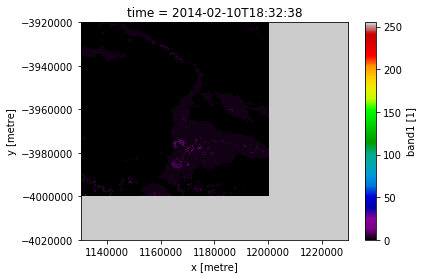

In [76]:
# Plot data
var_xarray.band1.isel(time=0).plot.imshow(cmap="nipy_spectral")

In [77]:
# Create binary layer representing artificial water (1) and natural water (0)
artwatr_wat_cat_ds = ((var_xarray["band1"] == 1) | (var_xarray["band1"] == 8))

In [78]:
# Convert to Dataset and add name
artwatr_wat_cat_ds = artwatr_wat_cat_ds.to_dataset(name="artwatr_wat_cat")

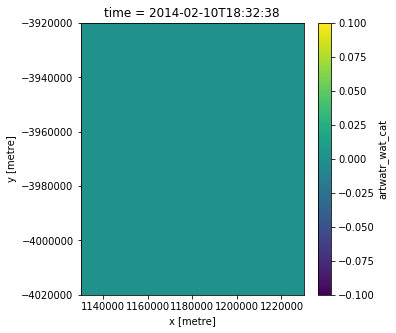

In [79]:
# Plot output
artwatr_wat_cat_ds["artwatr_wat_cat"].plot(figsize=(5, 5))

In [80]:
artwatr_wat_cat_ds = artwatr_wat_cat_ds.squeeze().drop('time')
artwatr_wat_cat_ds

<xarray.Dataset>
Dimensions:          (x: 4000, y: 4000)
Coordinates:
  * y                (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x                (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    artwatr_wat_cat  (y, x) bool False False False False False False False ...

In [81]:
variables_xarray_list = []
variables_xarray_list.append(artwatr_wat_cat_ds)
variables_xarray_list.append(aquatic_wat_cat_ds)
variables_xarray_list.append(vegetat_veg_cat_ds)
variables_xarray_list.append(cultman_agr_cat)
variables_xarray_list.append(artific_urb_cat)

## Classification

The LCCS classificaition is hierachial. The 8 classes are shown below.

| Class name | Code | Numeric code |
|----------------------------------|-----|-----|
| Cultivated Terrestrial Vegetated | A11 | 111 |
| Natural Terrestrial Vegetated | A12 | 112 |
| Cultivated Aquatic Vegetated | A23 | 123 |
| Natural Aquatic Vegetated | A24 | 124 |
| Artificial Surface | B15 | 215 |
| Natural Surface | B16 | 216 |
| Artificial Water | B27 | 227 |
| Natural Water | B28 | 228 |


In [82]:
# Merge to a single dataframe
classification_data = xarray.merge(variables_xarray_list)

In [83]:
classification_data

<xarray.Dataset>
Dimensions:          (x: 4000, y: 4000)
Coordinates:
  * y                (y) float64 -3.92e+06 -3.92e+06 -3.92e+06 -3.92e+06 ...
  * x                (x) float64 1.13e+06 1.13e+06 1.13e+06 1.13e+06 ...
Data variables:
    artwatr_wat_cat  (y, x) bool False False False False False False False ...
    aquatic_wat_cat  (y, x) bool False False False False False False False ...
    vegetat_veg_cat  (y, x) bool False False False False False False False ...
    cultman_agr_cat  (y, x) bool False False False False False False False ...
    artific_urb_cat  (y, x) bool False False False False False False False ...

In [84]:
# Apply Level 3 classification using separate function. Works through in three stages
level1, level2, level3 = lccs_l3.classify_lccs_level3(classification_data)

In [85]:
# Save classification values back to xarray
out_class_xarray = xarray.Dataset({"level1" : (classification_data["vegetat_veg_cat"].dims, level1),
                                   "level2" : (classification_data["vegetat_veg_cat"].dims, level2),
                                   "level3" : (classification_data["vegetat_veg_cat"].dims, level3)})
classification_data = xarray.merge([classification_data, out_class_xarray])
classification_data

col_level2 = cm.get_cmap("Set1", 2)
# classification_data.level2.plot(cmap=(col_level2))

In [86]:
print("level 1:",numpy.unique(classification_data.level1))
print("level 2:",numpy.unique(classification_data.level2))
print("level 3:",numpy.unique(classification_data.level3))

level 1: [100 200]
level 2: [10 20]
level 3: [111 112 123 124 215 216 228]


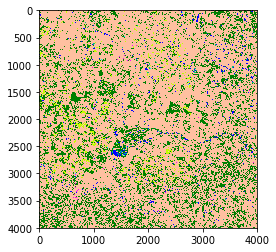

In [87]:
red, green, blue, alpha = lccs_l3.colour_lccs_level3(level3)
pyplot.imshow(numpy.dstack([red, green, blue, alpha]))
#classification_data.level3.plot(cmap='', figsize=(10,10))

In [88]:
import gdal
def array_to_geotiff(fname, data, geo_transform, projection,
                     nodata_val=0, dtype=gdal.GDT_Int16):

    # Set up driver
    driver = gdal.GetDriverByName('GTiff')

    # Create raster of given size and projection
    rows, cols = data.shape
    dataset = driver.Create(fname, cols, rows, 1, dtype)
    dataset.SetGeoTransform(geo_transform)
    dataset.SetProjection(projection)

    # Write data to array and set nodata values
    band = dataset.GetRasterBand(1)
    band.WriteArray(data)
    band.SetNoDataValue(nodata_val)

    # Close file
    dataset = None

In [89]:
#create 'transform' tuple that will define the dimensions of the rasterized shapefile and exporty
import osr
srs = osr.SpatialReference()
srs.ImportFromEPSG(3577)
prj_wkt = srs.ExportToWkt()

easting = float(ls8_gm.x[0])
W_E_pixelRes = float(ls8_gm.y[0] - ls8_gm.y[1])
rotation = 0.0 #(if image is 'north up')
northing = float(ls8_gm.y[0])
rotation1 = 0.0 #(if image is 'north up')
N_S_pixelRes = float(ls8_gm.x[0] - ls8_gm.x[1])

transform = (easting, W_E_pixelRes, rotation, northing, rotation1, N_S_pixelRes)

array_to_geotiff(results,
                  level3,
                  geo_transform = transform, 
                  projection = prj_wkt, 
                  nodata_val=0)

In [90]:
# from cartopy.feature import NaturalEarthFeature
# shp_fn = shpreader.natural_earth(resolution=resolution, category='cultural', name='populated_places')

# states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                                  name='admin_1_states_provinces_shp')